<a href="https://colab.research.google.com/github/AmujoeAdiday/A-star-search-to-find-the-best-path/blob/main/%3COn_uma_Lomsomboot_assignment1_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **5. Use tensorflow for automatic differentiation**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
def initialize_parameters(nx,nh,ny):
    #set the random seed so the same random values are generated every time you run this function
    tf.random.set_seed(1)

    
    #initialize weights to small random numbers and biases to zeros for each layer
    W1=tf.Variable(tf.random.uniform(shape=(nh,nx), minval=-0.01, maxval=0.01),name = "W1")
    b1=tf.Variable(tf.zeros(shape=(nh,1),name = "b1"))
    W2=tf.Variable(tf.random.uniform(shape=(ny,nh), minval=-0.01, maxval=0.01),name = "W2")
    b2=tf.Variable(tf.zeros(shape=(ny,1),name = "b2"))
   
    #create a dictionary of network parameters
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [ ]:
def forward_pass(parameters,X):
    X =tf.cast(X, tf.float32)
    Z1= tf.matmul(parameters["W1"],X)+parameters["b1"] # b1 is broadcasted n times before it is added to np.dpt(W1,X1)
    
    Yhat=tf.matmul(parameters["W2"],Z1)+parameters["b2"] #b2 is broadcasted n times before it is added to np.dpt(W2,A1)
    
     
    return Yhat

In [ ]:
"""
n is the number of examples, y is a vector of actual/observed outputs and yhat is a vector of predicted outputs
""" 
def compute_loss(Y,Yhat):
   
    per_sample_loss = tf.pow(Y-Yhat,2) 
    loss = tf.reduce_mean(per_sample_loss)
    return loss

In [ ]:
from tensorflow.python.ops.gradients_impl import gradients
def backward_pass(parameters, loss, tape):
  gradients = tape.gradient(loss, parameters)
  return gradients

In [ ]:
def update_parameters(parameters, gradients, learning_rate):
    parameters["W1"].assign_sub(learning_rate*gradients["W1"])
    parameters["W2"].assign_sub(learning_rate*gradients["W2"])
    parameters["b1"].assign_sub(learning_rate*gradients["b1"])
    parameters["b2"].assign_sub(learning_rate*gradients["b2"])
    return parameters

In [ ]:
"""
Arguments: train_X: is the training dataset (features)
           train_Y: is the vector of labels for training_X
           val_X: is the vector of validation dataset (features)
           val_y: is the vector of labels for val_X
           nh: is the number of neurons in the hidden layer
           num_iterations: The number of iterations of gradient descent
"""
def create_nn_model(train_X,train_Y,nh, val_X, val_Y, num_iterations, learning_rate):
    """
    Do some safety check on the data before proceeding. 
    train_X and val_X must have the same number of features (i.e., same number of rows)
    train_X must have the same number of examples as train_Y (i.e., same number of columns )
    val_X must have the same number of examples as Val_Y
    """ 
    assert(train_X.shape[0]==val_X.shape[0]), "train_X and val_X must have the same number of features"
    assert(train_X.shape[1]==train_Y.size), "train_X and train_Y must have the same number of examples"
    assert(val_X.shape[1]==val_Y.size), "val_X and val_Y must have the same number of examples" 
    
    
    #getting the number of features
    nx=train_X.shape[0]
    
    # We want to use this network for binary classification, so we have only one neuron in the output layer with a sigmoid activation
    ny=1
    
    # initializing the parameteres
    parameters=initialize_parameters(nx,nh,ny)
    
    
    #initialize lists to store the training and valideation losses for each iteration. 
    val_losses=[]
    train_losses=[]
    
    #run num_iterations of gradient descent
    for i in range (0, num_iterations):
      with tf.GradientTape() as tape:
        train_Yhat = forward_pass(parameters,train_X)
        train_loss = compute_loss(train_Y, train_Yhat)
      
        #compute validation loss
      Yhat_val= forward_pass(parameters,val_X)
      val_loss=compute_loss(val_Y,Yhat_val)
      
      #print the trianing loss and validation loss for each iteration.
      print("iteration {} :train_loss:{} val_loss{}".format(i,train_loss,val_loss))

       # append the train and validation loss for the current iteration to the train_losses and val_losses 
      train_losses.append(train_loss)
      val_losses.append(val_loss)
     
      """
      Compute the gradients and update the parameters
      """    
      #compute the gradients on the training data
      gradients=backward_pass(parameters,train_loss,tape)

      # update the parameters
      parameters=update_parameters(parameters, gradients, learning_rate)

    
    
    #create a dictionary history and put train_loss and validaiton_loss in it
    history={"val_loss": val_losses,
             "train_loss": train_losses}
        
        
    #return the parameters and the history
    return parameters, history
      







In [ ]:
def predict(parameters,X, prob_threshold=0.5):
    Yhat=forward_pass(parameters, X)
    # predict class 1 if the output is greater than prob_threshold; otherwise, predict zero
    predicted_label=np.where(Yhat>prob_threshold, 1, 0)  
    return predicted_label

In [ ]:
def accuracy(observedY,predictedY):
    #return the ratio of the examples for which predictedY=observedY over the total number of examples
    return float(np.sum(predictedY==observedY))/observedY.size

In [ ]:
def scale_label_down(arr):
  return np.divide(arr,100000)


In [ ]:
def feature_wise_normalization(feature_data):
  mean = np.mean(feature_data, axis = 0)
  std = np.std(feature_data, axis = 0)
  print(mean,std)
  new_data = np.subtract(feature_data,mean)
  return np.divide(new_data,std)

x = np.array([[1,0,3],[4,5,16]])
print(feature_wise_normalization(x))

[2.5 2.5 9.5] [1.5 2.5 6.5]
[[-1. -1. -1.]
 [ 1.  1.  1.]]


In [ ]:
data = pd.read_csv("sample_data/california_housing_train.csv").to_numpy()


np.random.shuffle(data)
# original_features = data[:,:-1]
# features = feature_wise_normalization(original_features)

# original_label =  data[:,-1]

# labels = scale_label_down(original_label)

split_size = int(0.8*len(data))

# train_X, val_X = features[: split_size], features[split_size:]
# train_Y, val_Y = labels[: split_size], labels[split_size:]


train = np.transpose(data[:split_size,:])
val = np.transpose(data[split_size:, :])


#features are in X
#label is in Y
train_X = feature_wise_normalization(train[:-1,])
train_Y = scale_label_down(train[-1,])


#reshape train_Y and val_Y
train_Y = np.reshape(train_Y, (1,train_Y.size))

val_X = feature_wise_normalization(val[:-1,])
val_Y = scale_label_down(val[-1,])

val_Y = np.reshape(val_Y, (1,val_Y.size))

print("trainx",train_X.shape)
print("val x",val_X.shape)
print("trainy",train_Y.shape)

print("val y",val_Y.shape)


[471.0963875 438.0891    317.1333875 ... 470.51265   568.875225
 849.14055  ] [ 669.16087182  662.53354739  438.40666015 ...  656.37111534  827.96444666
 1203.4774696 ]
[574.9236125 404.96735   547.1849125 ... 416.0913375 329.21625
 403.9564125] [751.00160878 614.43472881 779.35249169 ... 605.00482494 433.42731132
 551.69610686]
trainx (8, 13600)
val x (8, 3400)
trainy (1, 13600)
val y (1, 3400)


In [ ]:
iterations=2000
parameters, history=create_nn_model(train_X,train_Y,50, val_X, val_Y, iterations, 1e-2)

iteration 0 :train_loss:5.6630377769470215 val_loss5.55766487121582
iteration 1 :train_loss:5.487386226654053 val_loss5.3834547996521
iteration 2 :train_loss:5.318718910217285 val_loss5.216200828552246
iteration 3 :train_loss:5.156501770019531 val_loss5.055371284484863
iteration 4 :train_loss:5.000255584716797 val_loss4.90048885345459
iteration 5 :train_loss:4.849534511566162 val_loss4.751113414764404
iteration 6 :train_loss:4.703921794891357 val_loss4.6068267822265625
iteration 7 :train_loss:4.563014507293701 val_loss4.467231273651123
iteration 8 :train_loss:4.4264235496521 val_loss4.331939220428467
iteration 9 :train_loss:4.293766498565674 val_loss4.2005720138549805
iteration 10 :train_loss:4.164668083190918 val_loss4.072756767272949
iteration 11 :train_loss:4.038759231567383 val_loss3.9481279850006104
iteration 12 :train_loss:3.915675640106201 val_loss3.8263251781463623
iteration 13 :train_loss:3.7950644493103027 val_loss3.7069990634918213
iteration 14 :train_loss:3.6765849590301514

In [1]:
plt.plot(range(0,iterations),history["train_loss"],'b')
plt.plot(range(0,iterations),history["val_loss"],'r')
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()

NameError: ignored

iteration 0 :train_loss:5.6630377769470215 val_loss5.55766487121582
iteration 1 :train_loss:5.487386226654053 val_loss5.3834547996521
iteration 2 :train_loss:5.318718910217285 val_loss5.216200828552246
iteration 3 :train_loss:5.156501770019531 val_loss5.055371284484863
iteration 4 :train_loss:5.000255584716797 val_loss4.90048885345459
iteration 5 :train_loss:4.849534511566162 val_loss4.751113414764404
iteration 6 :train_loss:4.703921794891357 val_loss4.6068267822265625
iteration 7 :train_loss:4.563014507293701 val_loss4.467231273651123
iteration 8 :train_loss:4.4264235496521 val_loss4.331939220428467
iteration 9 :train_loss:4.293766498565674 val_loss4.2005720138549805
iteration 10 :train_loss:4.164668083190918 val_loss4.072756767272949
iteration 11 :train_loss:4.038759231567383 val_loss3.9481279850006104
iteration 12 :train_loss:3.915675640106201 val_loss3.8263251781463623
iteration 13 :train_loss:3.7950644493103027 val_loss3.7069990634918213
iteration 14 :train_loss:3.6765849590301514

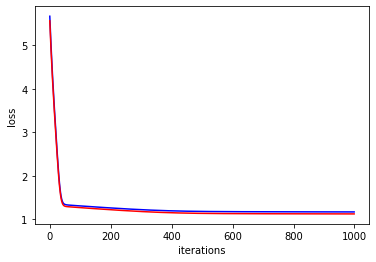

In [ ]:
iterations=1000
parameters, history=create_nn_model(train_X,train_Y,50, val_X, val_Y, iterations, 1e-2)
plt.plot(range(0,iterations),history["train_loss"],'b')
plt.plot(range(0,iterations),history["val_loss"],'r')
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()